# Analiza podatkov

Podatki so bili vzeti s strani [https://www.famousbirthdays.com/](https://www.famousbirthdays.com/).

Najprej naložimo potrebne podatke in knjižice.

In [62]:
import pandas as pd
pd.set_option('display.max_rows', 15)
%matplotlib inline

LJUDJE = pd.read_csv('tabela_podatki.csv')

Poglejmo si podatke.

In [63]:
LJUDJE

,Ime,Starost,Poklic,Rojstni dan,Horoskop
0,Logan Paul,29,YouTube Star,01-04,Oven
1,Randy Orton,44,Wrestler,01-04,Oven
2,Scotty Sire,32,YouTube Star,01-04,Oven
3,Asa Butterfield,27,Movie Actor,01-04,Oven
4,Jslutty,23,Instagram Star,01-04,Oven
...,...,...,...,...,...
16783,Mar Lucas Vilar,21,Instagram Star,09-09,Devica
16784,Estelle Ogilvy,21,Instagram Star,09-09,Devica
16785,Taina Licciardo-Toivola,46,YouTube Star,09-09,Devica
16786,Alex Nino,26,TikTok Star,09-09,Devica


Podatke uredimo po abecednem vrstnem redu.

In [64]:
ljudje_po_abecedi = LJUDJE.sort_values('Ime')
ljudje_po_abecedi

,Ime,Starost,Poklic,Rojstni dan,Horoskop
3138,$not,26,Rapper,16-12,Strelec
7807,03 Greedo,37,Rapper,26-07,Lev
8578,070 Shake,27,Rapper,13-06,Dvojčka
6267,09sharkboy,24,YouTube Star,24-01,Vodnar
727,0zuottag,26,Instagram Star,23-04,Bik
...,...,...,...,...,...
15320,Ángela Aguilar,20,World Music Singer,08-10,Tehtnica
14295,Ñengo Flow,42,Reggaeton Singer,15-10,Tehtnica
16256,Óscar Morales,27,YouTube Star,26-09,Tehtnica
13455,Óscar Morales,27,YouTube Star,26-11,Strelec


### Rojeni na 29. 2.

Poiščemo znane osebe, ki so rojene na 29. 2.

In [65]:
filter_rojeni_na_prestopno_leto = LJUDJE['Rojstni dan'] == '29-02'
rojeni_na_prestopno_leto = LJUDJE[filter_rojeni_na_prestopno_leto]
rojeni_na_prestopno_leto.sort_values('Starost')

,Ime,Starost,Poklic,Rojstni dan,Horoskop
5182,Amelia KidsToys&Adventures,16,YouTube Star,29-02,Ribi
5210,Jana SevenPerfectAngels,20,YouTube Star,29-02,Ribi
5204,Valentino Bonaccio,20,Instagram Star,29-02,Ribi
5194,Lydia Jacoby,20,Swimmer,29-02,Ribi
5185,Max Torina,20,TV Actor,29-02,Ribi
...,...,...,...,...,...
5181,Pedro Sánchez,52,Politician,29-02,Ribi
5199,Joey Greco,52,TV Actor,29-02,Ribi
5179,Tony Robbins,64,Motivational Speaker,29-02,Ribi
5193,Khaled,64,Folk Singer,29-02,Ribi


Vidimo, da je 42 oseb rojenih na ta dan.

### Ljudje rojeni na nek dan

Nato združimo osebe po rojstnih dnevih in jih preštejemo.

In [66]:
rojstni_dnevi = LJUDJE[['Ime', 'Rojstni dan']].copy()
po_rojstnih_dnevih = rojstni_dnevi.groupby('Rojstni dan').size()
po_rojstnih_dnevih


Rojstni dan
01-01    44
01-02    43
01-03    47
01-04    45
01-05    47
         ..
31-05    44
31-07    47
31-08    48
31-10    46
31-12    45
Length: 366, dtype: int64

Zanima nas tudi, na kateri dan je rojenih največ/najmanj znanih osebnosti.

In [67]:
po_rojstnih_dnevih.sort_values()

Rojstni dan
29-02    42
25-12    42
06-02    42
20-02    42
04-07    43
         ..
02-11    48
03-10    48
03-11    48
03-07    48
31-08    48
Length: 366, dtype: int64

Kot pričakovano, jih je najmanj rojenih na 29. 2.
Največ jih je rojenih na več datumov.

(Podatki sicer niso najbolj točni, saj na spletni strani za določen dan pokaže le neko omejeno število znanih oseb)

Združimo osebe še glede na horoskop.

In [68]:
horoskopi = LJUDJE[['Horoskop']].copy()
po_horoskopu = horoskopi.groupby('Horoskop').size()
po_horoskopu.sort_values()

Horoskop
Kozorog      1323
Vodnar       1364
Tehtnica     1373
Strelec      1376
Oven         1378
Škorpijon    1382
Lev          1420
Ribi         1423
Devica       1424
Bik          1426
Dvojčka      1426
Rak          1473
dtype: int64

Vidimo, da je največ znanih oseb po horoskopu rak, najmanj pa kozorog.

Zdaj narišimo stolpični diagram za horoskope.

<Axes: xlabel='Horoskop'>

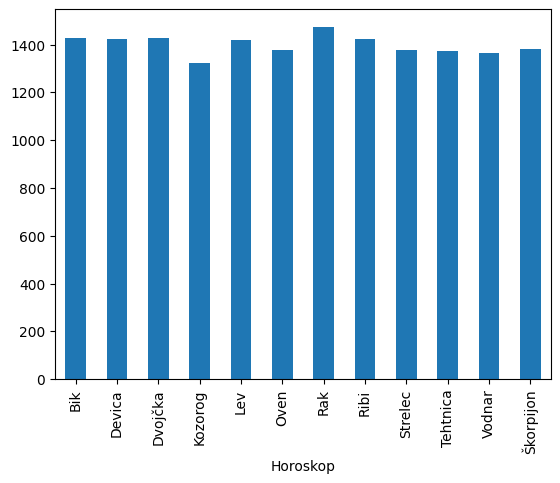

In [69]:
po_horoskopu.plot.bar()

Podobno naredimo še za poklice.

In [70]:
po_poklicih = LJUDJE[['Poklic']].groupby('Poklic').size()
po_poklicih.sort_values()


Poklic
Astrophysicist          1
Badminton Player        1
Clubhouse Star          1
Cellist                 1
Conceptual Artist       1
                     ... 
TV Actress            891
Pop Singer            936
Instagram Star       1172
TikTok Star          3217
YouTube Star         3534
Length: 177, dtype: int64

Največ znanih oseb je YouTube zvezdnikov.

### Starost

Poglejmo še, najpogostejšo starost zvezdnikov.

Ker so nekatere starosti dane z meseci, najprej definiram funkcijo, ki le te pretvori v leta.

In [76]:
def pretvori_v_leta(starost):
    if 'months' in starost:
        meseci = int(starost.split()[0])
        leta = meseci / 12  
        return round(leta, 2)  
    else:
        return float(starost.split()[0]) 

LJUDJE['Starost v letih'] = LJUDJE['Starost'].apply(pretvori_v_leta)
starost = LJUDJE.groupby('Starost v letih').size()
starost.sort_values()



Starost v letih
0.17        1
0.42        1
0.50        1
0.58        1
105.00      1
         ... 
26.00     796
21.00     832
23.00     842
22.00     846
24.00     890
Length: 111, dtype: int64

Največ znanih je torej starih 24 let.

<Axes: xlabel='Starost v letih', ylabel='število ljudi'>

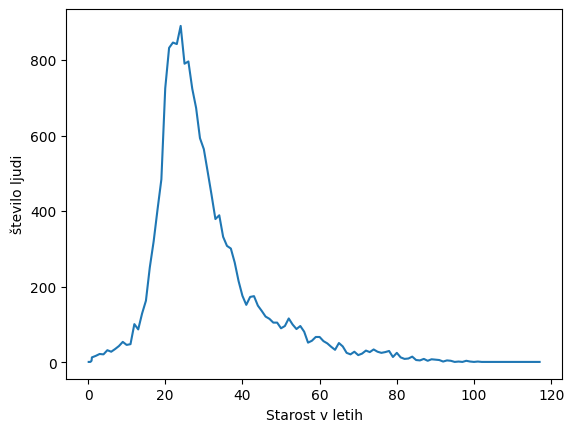

In [77]:
starost.plot(ylabel = 'število ljudi')

Pričakovano se z leti zmanjšuje število znanih oseb.

### Meseci

Ločimo rojstni dan na dan in mesec. Poglejmo, v katerem mesecu je rojenih največ zvezdnikov.

In [ ]:
LJUDJE[['Dan', 'Mesec']] = LJUDJE['Rojstni dan'].str.split('-', expand=True)
po_mesecu = LJUDJE.groupby('Mesec').size().sort_values()
po_mesecu

Mesec
02    1319
04    1378
11    1379
09    1379
06    1387
12    1415
08    1415
01    1416
10    1422
05    1423
07    1427
03    1428
dtype: int64

Vidimo torej, da je največ rojenih v mesecu marcu, najmanj pa v februarju.

Poglejmo si še graf.

<Axes: ylabel='Mesec'>

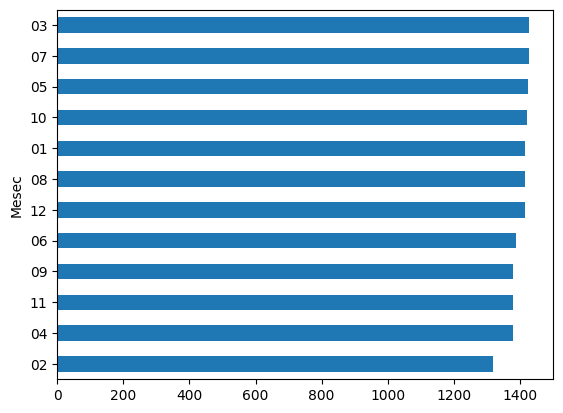

In [ ]:
po_mesecu.plot.barh()

### Dnevi

Enako kot za mesece, naredimo še za dneve.

In [ ]:
po_dnevih = LJUDJE.groupby('Dan').size().sort_values()
po_dnevih

Dan
31    324
30    509
12    541
29    542
21    543
     ... 
09    556
11    556
14    557
24    558
03    563
Length: 31, dtype: int64

<Axes: xlabel='Dan'>

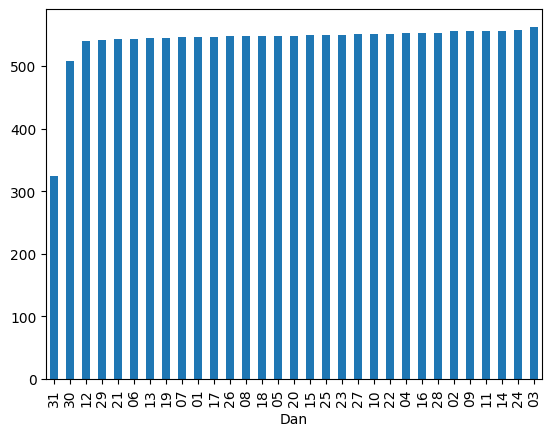

In [ ]:
po_dnevih.plot.bar()

Opazimo, da je najmanj rojenih na 31., kar je pričakovano. Največ ljudi je rojenih na 3.